In [55]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt, gc

from tqdm import tqdm
train = pd.read_csv('/Users/anishpawar/MTech/Sem-2/IVP/Project_PreProc_Final_Report/hms-harmful-brain-activity-classification/train.csv')
print('Train shape', train.shape )
display( train.head(10) )

FileNotFoundError: [Errno 2] No such file or directory: '/Users/anishpawar/MTech/Sem-2/IVP/Project_PreProc_Final_Report/hms-harmful-brain-activity-classification/train.csv'

In [10]:
import warnings

# Suppress specific warning
warnings.filterwarnings("ignore", message=".*", category=UserWarning)


In [11]:
NAMES = ['LL','LP','RP','RR']

FEATS = [['Fp1','F7','T3','T5','O1'],
         ['Fp1','F3','C3','P3','O1'],
         ['Fp2','F8','T4','T6','O2'],
         ['Fp2','F4','C4','P4','O2']]

directory_path = 'EEG_Spectrograms/'
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

In [12]:
import pywt
print("The wavelet functions we can use:")
print(pywt.wavelist())

USE_WAVELET = "db8"

The wavelet functions we can use:
['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5'

In [13]:
def maddest(d, axis=None):
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def denoise(x, wavelet='haar', level=1):    
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * maddest(coeff[-level])

    uthresh = sigma * np.sqrt(2*np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])

    ret=pywt.waverec(coeff, wavelet, mode='per')
    
    return ret

In [14]:
root = '/Users/anishpawar/MTech/Sem-2/IVP/Project_PreProc_Final_Report/IVP-EEG-Classification/hms-harmful-brain-activity-classification'

metadata = pd.read_csv(f'{root}/train.csv')
metadata

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106795,351917269,6,12.0,2147388374,6,12.0,4195677307,10351,LRDA,0,0,0,3,0,0
106796,351917269,7,14.0,2147388374,7,14.0,290896675,10351,LRDA,0,0,0,3,0,0
106797,351917269,8,16.0,2147388374,8,16.0,461435451,10351,LRDA,0,0,0,3,0,0
106798,351917269,9,18.0,2147388374,9,18.0,3786213131,10351,LRDA,0,0,0,3,0,0


In [15]:
def getWindowsfromEEG(eeg_id):
    # print(eeg_id)
    # eeg_id = 1628180742
    # eeg_df = metadata[metadata["eeg_id"] == eeg_id].reset_index(drop=True)
    eeg = pd.read_parquet(f'{root}/train_eegs/{eeg_id}.parquet')

    fs = 200
    eeg["time"] = eeg.index / fs
    eeg.set_index("time", inplace=True)
    eeg.index

    subSet = metadata[metadata['eeg_id']==eeg_id]
    # print(subSet)
    offSets = [subSet['eeg_sub_id'].to_numpy(),subSet['eeg_label_offset_seconds'].to_numpy()]
    offSets = np.array(offSets)
    

    # print(eeg.shape)
    toRet = []
    for i in offSets[1]:
        toRet.append(eeg.loc[i+20:i+30])
    # toRet = np.array(toRet)
    return offSets[0],toRet,eeg


In [16]:
FEATS

[['Fp1', 'F7', 'T3', 'T5', 'O1'],
 ['Fp1', 'F3', 'C3', 'P3', 'O1'],
 ['Fp2', 'F8', 'T4', 'T6', 'O2'],
 ['Fp2', 'F4', 'C4', 'P4', 'O2']]

In [17]:
from scipy.signal import butter, filtfilt

def apply_lpf(data, sampling_rate=200, cutoff_freq=10, order=5):

    nyquist_freq = 0.5 * sampling_rate
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)

    return filtered_data

In [18]:
import librosa

def spectrogram_from_eeg(eeg_id, display=False,USE_WAVELET='db16'):
    

    offSets,sliced_eegs,OG_eeg = getWindowsfromEEG(eeg_id)

    
    
    if display: plt.figure(figsize=(10,7))

    retSpecs = []
    retEEGs = []
    ogEEGs = []

    for idx,eeg in enumerate(sliced_eegs):

        img = np.zeros((128,128),dtype='float32')
        signals = []
        signalsX = []
        signalsXOG = []
        for k in range(4):
            COLS = FEATS[k]

            tempSpec= np.zeros((128,128))

            if USE_WAVELET=="LPF10" or USE_WAVELET=="LPF20" or USE_WAVELET == "None":
                temp = np.zeros((2001))
                tempOG = np.zeros((2001))
            else:
                temp = np.zeros((2002))
                tempOG = np.zeros((2001))
            # print(COLS)
            for kk in range(4):
            
                # COMPUTE PAIR DIFFERENCES
                x = eeg[COLS[kk]] - eeg[COLS[kk+1]]
                tempOG+=x
                # FILL NANS
                m = np.nanmean(x)
                if np.isnan(x).mean()<1: x = np.nan_to_num(x,nan=m)
                else: x[:] = 0

                # DENOISE
                
                if USE_WAVELET=='LPF10':
                    # print(USE_WAVELET)
                    x = apply_lpf(x,cutoff_freq=10)
                elif USE_WAVELET=='LPF20':
                    # print(USE_WAVELET)
                    x = apply_lpf(x,cutoff_freq=20)
                else:
                    x = denoise(x, wavelet=USE_WAVELET)

                temp+=x
                signals.append(x)
                
                # RAW SPECTROGRAM
                mel_spec = librosa.feature.melspectrogram(y=x, sr=200, hop_length=len(x)//128, 
                    n_fft=1024, n_mels=128, fmin=0, fmax=20, win_length=128)

                # LOG TRANSFORM
                width = (mel_spec.shape[1]//32)*32
                mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max).astype(np.float32)[:,:width]

                # STANDARDIZE TO -1 TO 1
                mel_spec_db = (mel_spec_db+40)/40 
                tempSpec += mel_spec_db
            temp/=4.0
            tempOG/=4.0
            
            signalsX.append(temp)    
            signalsXOG.append(tempOG)

            # AVERAGE THE 4 MONTAGE DIFFERENCES
            tempSpec /= 4.0

            img  = np.vstack((img,tempSpec))

            print(f'Image shape is: {img.shape}')

        retSpecs.append(img[128:])

        retEEGs.append(np.array(signalsX))
        ogEEGs.append(np.array(signalsXOG))





    return np.array(retSpecs),np.array(retEEGs),np.array(ogEEGs)


In [19]:
!rm -r Processed_Specs

In [20]:
!mkdir Processed_Specs

### Plotting Before and after

In [21]:
import matplotlib.pyplot as plt
import numpy as np



def plotEEG(EEG1,EEG2,USE_WAVELET):
    num_rows = 10
    num_cols = 6

    x1 = EEG1[0].shape[0]
    x2 = EEG2[0].shape[0]
    

    fig = plt.figure(figsize=(20, 20)) 
    figsL = ['LL','LP',"RP","RR"]
    for i in tqdm(range(1,9)):
        fig.add_subplot(4,2,i)
        if i%2==1:
            
            plt.title(label=f'{figsL[(i-1)//2]} - Original')
            plt.plot(range(x1),(EEG1[(i-1)//2]))

        else:
            if USE_WAVELET:
                plt.title(label=f'{figsL[(i-1)//2]}, {USE_WAVELET} - Filtered')
            else:
                plt.title(label=f'{figsL[(i-1)//2]} - Filtered')
            plt.plot(range(x2),(EEG2[(i-1)//2]))


    plt.tight_layout()
    plt.show()


In [22]:
def processAndPlot(eeg_id,USE_WAVELET='db1',plot=False):
    
    retSpecs,retEEGs,ogEEGS = spectrogram_from_eeg(eeg_id,USE_WAVELET=USE_WAVELET)
    # print(retEEGs[0])
    # print(r)
    if plot:
        plotEEG(ogEEGS[0],retEEGs[0],USE_WAVELET=None)
    return retEEGs,ogEEGS

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


100%|██████████| 8/8 [00:00<00:00, 65.78it/s]


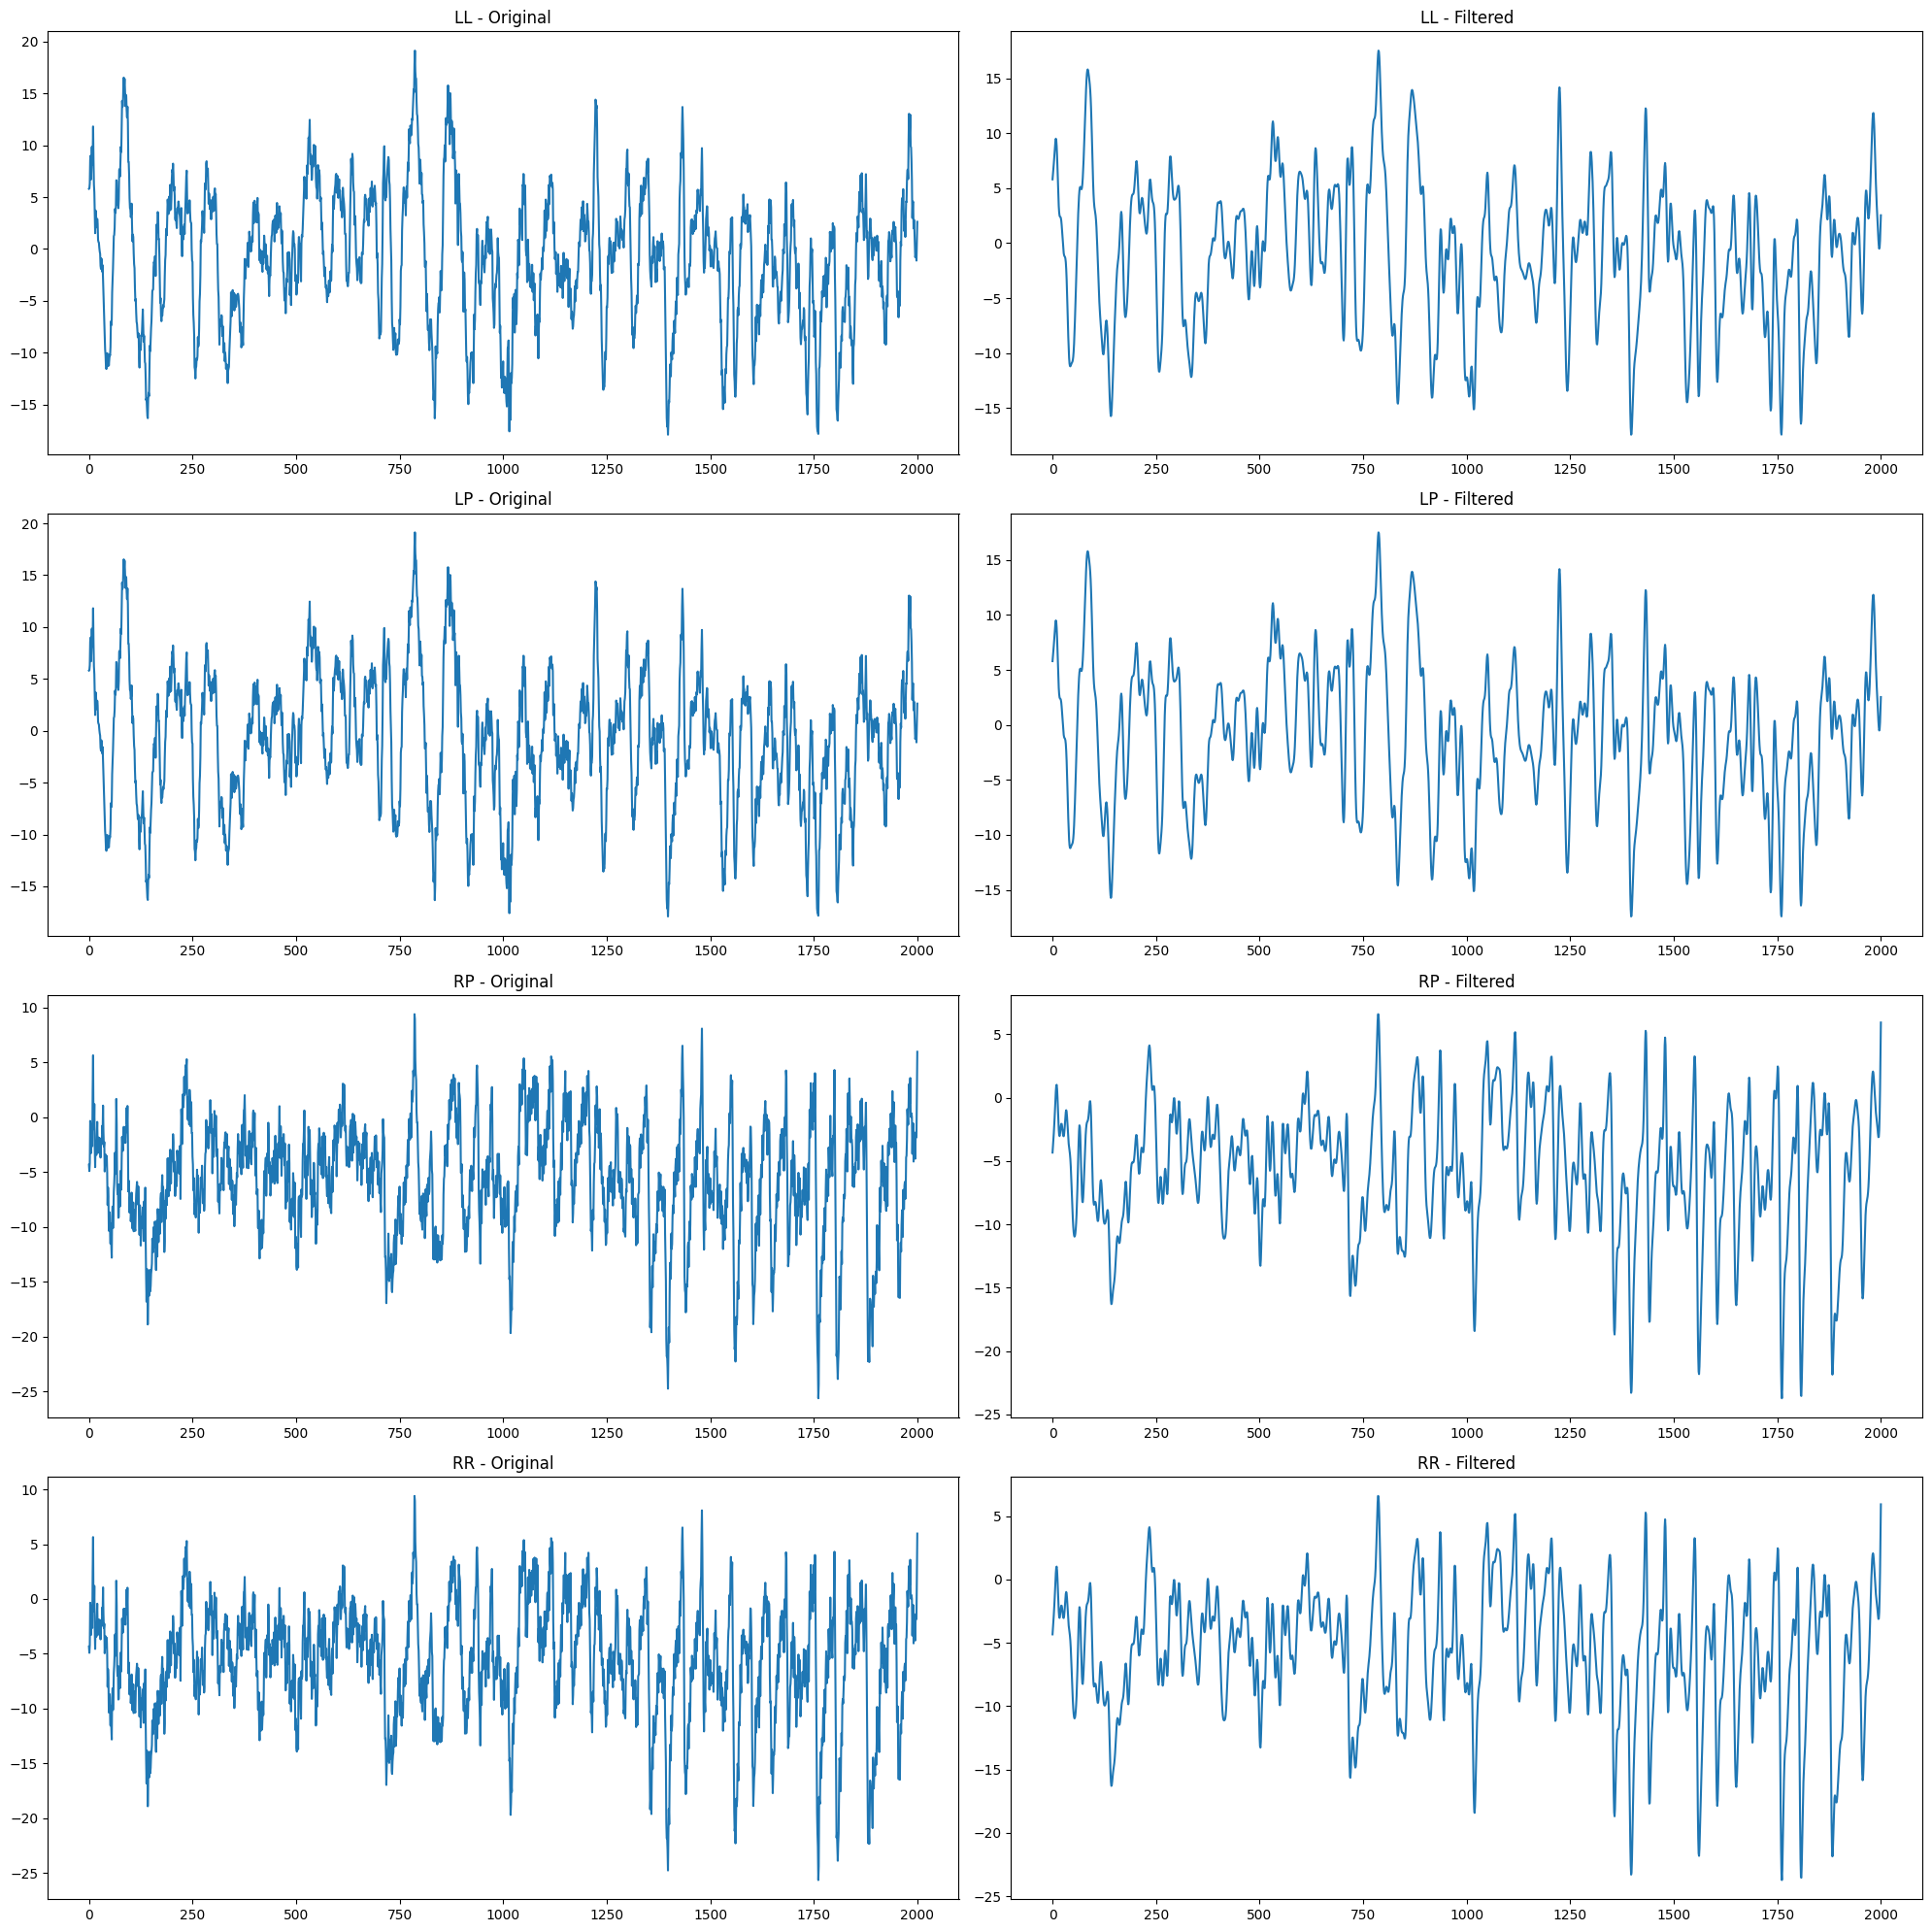

In [23]:
proc,og = processAndPlot(eeg_id = 1628180742,USE_WAVELET='LPF20',plot=True)

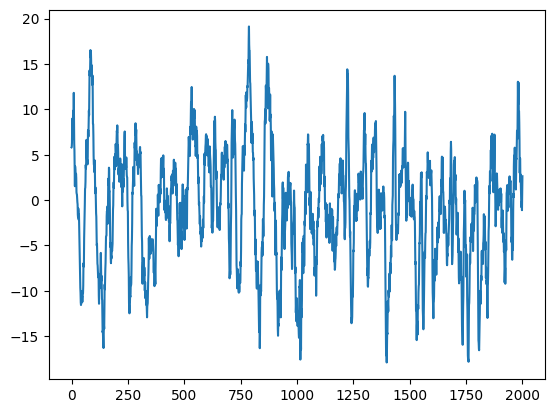

In [24]:
plt.plot(range(2001),og[0][0])

In [25]:
retSpecs,retEEGs,ogEEGS = spectrogram_from_eeg(1628180742,USE_WAVELET='LPF20')


Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


In [26]:
retSpecs.shape

(9, 512, 128)

In [27]:
# stackedSpecs = retSpecs[0,:,:,0]

# for i in range(1,4):
#     stackedSpecs = np.vstack((stackedSpecs,retSpecs[0,:,:,i]))
for i in range(9):
    # plt.imshow(retSpecs[1])
    print(retSpecs[i].shape)

(512, 128)
(512, 128)
(512, 128)
(512, 128)
(512, 128)
(512, 128)
(512, 128)
(512, 128)
(512, 128)


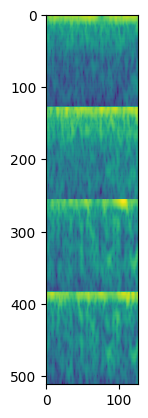

In [28]:
plt.imshow(retSpecs[4])

## Trying Metrics

### Helper

In [29]:
from sklearn.metrics import mutual_info_score
from scipy.stats import entropy


In [30]:
def calculate_mutual_information(signal1, signal2):
    try:
        mi = mutual_info_score(signal1, signal2)
    except:
        mi = 0
    

    return mi

In [31]:
def calculate_kl_divergence(signal1, signal2):
    try:
        p = np.histogram(signal1, bins='auto', density=True)[0]
        q = np.histogram(signal2, bins='auto', density=True)[0]
        # print(signal1.shape,signal2.shape)
        kl_div = entropy(p, q)
    except:
        kl_div = 1
    return kl_div

In [32]:
def lsd_distortion(signal1, signal2):
    try:
        assert len(signal1) == len(signal2), "Signals must have the same length"
        lsb_signal1 = signal1 %10
        lsb_signal2 = signal2 % 10
        lsd_diff = np.abs(lsb_signal1 - lsb_signal2)

        distortion = np.mean(lsd_diff)
    except:
        distortion = 0

    return distortion

In [33]:
from scipy.spatial.distance import cdist

def isd(X, Y):
    """
    Calculate the Incomplete Similarity Degree (ISD) between two 1D arrays.
    
    Parameters:
    X (array_like): First 1D array of points.
    Y (array_like): Second 1D array of points.
    
    Returns:
    float: The ISD value.
    """
    try:
    # Reshape input arrays to ensure they are 2D arrays
        X = np.atleast_2d(X).T
        Y = np.atleast_2d(Y).T
        
        # Calculate the pairwise distances between points in X and Y
        distances = cdist(X, Y)
        
        # Compute the distance of each point in X to its nearest neighbor in Y
        min_distances_X_to_Y = np.min(distances, axis=1)
        
        # Compute the maximum distance between any pair of points from X and Y
        max_distance_XY = np.max(distances)
        
        # Compute ISD
        isd_value = np.mean(1 - min_distances_X_to_Y / max_distance_XY)
        
    except:
        isd_value = 0

    # if isd_value!=Nan

    return isd_value

In [34]:
import numpy as np
from scipy.signal import welch

def spectral_entropy(signal1, signal2, fs=200.0, nperseg=None, noverlap=None, nfft=None, detrend='constant'):
    try:

        f_signal1, psd_signal1 = welch(signal1, fs=fs, nperseg=nperseg, noverlap=noverlap, nfft=nfft, detrend=detrend)
        f_signal2, psd_signal2 = welch(signal2, fs=fs, nperseg=nperseg, noverlap=noverlap, nfft=nfft, detrend=detrend)

        psd_signal1 /= np.sum(psd_signal1)
        psd_signal2 /= np.sum(psd_signal2)

        spectral_entropy_value = -np.sum(psd_signal1 * np.log2(psd_signal1)) - np.sum(psd_signal2 * np.log2(psd_signal2))
    except:
        spectral_entropy_value =0

    return spectral_entropy_value

In [35]:
def evaluate(EEG1,EEG2):    
    j=0
    stats = {'MI':[],'LSD':[],'SE':[],'ISD':[]}
    for i in range(4):
        e1,e2 = EEG1[j,i],EEG2[j,i]
        # print(type(e1))
        # e1 = np.nan_to_num(e1, nan=0)
        # e2 = np.nan_to_num(e1, nan=0)
        # print(EEG1[j,i].shape)
        if len(e1)<len(e2):
            slack = e2.copy()
            slack[:len(e1)] = e1
            stats['MI'].append(calculate_mutual_information(slack,e2))
            stats['LSD'].append(lsd_distortion(slack,e2))
            stats['SE'].append(spectral_entropy(slack,e2))
            stats['ISD'].append(isd(slack,e2))
            # stats['KL'].append(calculate_kl_divergence(slack,e2))
        else:
            slack = e1.copy()
            slack[:len(e2)] = e2
            stats['MI'].append(calculate_mutual_information(e1,slack))
            stats['LSD'].append(lsd_distortion(e1,slack))
            stats['SE'].append(spectral_entropy(e1,slack))
            stats['ISD'].append(isd(e1,slack))
            
        # totalStats.append(stats)

    

    return np.array(stats)

        

In [36]:
def plotBenchMark(evs,methods):
    fig = plt.figure(figsize=(10, 10)) 
    metrics = ['MI','LSD','SE','ISD']
    # print(len(metrics))

    for k in range(len(metrics)):
        # print()
        fig.add_subplot(2,2,k+1)
        
            
        # plt.title(label=f'{figsL[(i-1)//2]} - Original')
        # plt.plot(range(x1),EEG1[(i-1)//2])


        MIPlot = []
        for j in range(4):
            MItemp = []
            for i in range(len(methods)):
                MItemp.append((evs[i][k][j]))
            MIPlot.append(MItemp)
        MIPlot = np.array(MIPlot)

        data = MIPlot
        # x = np.arange(data.shape[0])
        x = ['LL','LP','RP','RR']

        # Plot each subarray against X-axis
        plotsLen = data.shape[1]
        for i in range(plotsLen):
            plt.plot(x, data[:, i], marker='o', label=f'{methods[i]}', alpha=0.5)


        plt.xlabel('Chain Value')
        plt.ylabel(f'{metrics[k]} for different methods')
        plt.title(f'{metrics[k]} for different chains and methods')
        plt.legend()
        plt.tight_layout()



In [37]:
evals = evaluate(proc,og)

In [38]:
evals

array({'MI': [7.53176908404604, 7.53176908404604, 7.510553753185993, 7.509860952405823], 'LSD': [1.212067306060641, 1.2120673079340065, 1.7573929085391364, 1.7573929086761306], 'SE': [6.841797718668266, 6.841797719708913, 8.15600877669101, 8.156008777495497], 'ISD': [0.9997600348070509, 0.9997600349533258, 0.9997663596354446, 0.9997663595854066]},
      dtype=object)

In [39]:
evals.shape

()

In [49]:
def benchmark(eeg_ids):
    methods = ['haar','db8','LPF10','LPF20']
    
    totEvals = []
    stats = ['MI','LSD','SE','ISD']
    
    for method in methods:
        count = 0
        toAv = []

        for eeg_id in tqdm(eeg_ids):
            for ls in range(4):
                proc,og = processAndPlot(eeg_id = eeg_id,USE_WAVELET=method,plot=False)
                # print(po)
                evals = evaluate(proc,og)
                # print(count)
                # print(evals.tolist()[stats[ls]])
                if count == 0:
                    toAv.append(evals.tolist()[stats[ls]])
                    # print("Creating")
                    # print(len(evals.tolist()[stats[ls]]))
                else:
                    # toAv[ls] +=evals.tolist()[stats[ls]]
                    toAv[ls] = [x + y for x, y in zip(toAv[ls], evals.tolist()[stats[ls]])]
                    # print("Creating 2")
            count+=1
        # print('---------------')
        
        for i in range(len(toAv)):
            toAv[i] = [item / len(eeg_ids) for item in toAv[i]]

        totEvals.append(toAv)
    totEvals = totEvals

    

    plotBenchMark(totEvals,methods)
    

    return totEvals
    
        


    

In [50]:
# def benchmark(eeg_ids):
#     methods = ['sym8','coif8','db8']
    
#     totEvals = []
#     stats = ['MI','LSD','SE','ISD']
    
#     for method in methods:
#         count = 0
#         toAv = []

#         for eeg_id in eeg_ids:
#             for ls in range(4):
#                 proc,og = processAndPlot(eeg_id = eeg_id,USE_WAVELET=method,plot=False)
#                 print(proc.shape,og[0].shape)
#                 evals = evaluate(proc,og)
#             print(evals,count)
#             print('---------------')
#                 # # print(count)
#                 # print(evals.tolist()[stats[ls]])
#                 # if count == 0:
#                 #     toAv.append(evals.tolist()[stats[ls]])
#                 #     # print("Creating")
#                 #     # print(len(evals.tolist()[stats[ls]]))
#                 # else:
#                 #     # toAv[ls] +=evals.tolist()[stats[ls]]
#                 #     toAv[ls] = [x + y for x, y in zip(toAv[ls], evals.tolist()[stats[ls]])]
#                 #     # print("Creating 2")
#             count+=1
        
        
#         # for i in range(len(toAv)):
#         #     toAv[i] = [item / len(eeg_ids) for item in toAv[i]]

#         # totEvals.append(toAv)
#     # totEvals = totEvals

    

#     # plotBenchMark(totEvals,methods)
    

#     return totEvals
    
        


    

In [51]:
eeg_ids = train.eeg_id.unique()[:20].tolist()

In [52]:
eeg_ids

[1628180742,
 2277392603,
 722738444,
 387987538,
 2175806584,
 1626798710,
 2529955608,
 1202099836,
 3037445252,
 2289322082,
 2295963202,
 2882017352,
 2578018731,
 8071080,
 989810287,
 3083733314,
 175641702,
 138236967,
 1448756052,
 374504640]

In [53]:
eeg_ids[0]

1628180742

  0%|          | 0/20 [00:00<?, ?it/s]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
I

  5%|▌         | 1/20 [00:04<01:33,  4.94s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 10%|█         | 2/20 [00:06<00:57,  3.19s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
I

 15%|█▌        | 3/20 [00:13<01:17,  4.59s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
I

 20%|██        | 4/20 [00:15<01:01,  3.82s/it]

Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 25%|██▌       | 5/20 [00:17<00:43,  2.89s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 30%|███       | 6/20 [00:18<00:32,  2.29s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
I

 35%|███▌      | 7/20 [00:20<00:29,  2.29s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 40%|████      | 8/20 [00:21<00:21,  1.77s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)


 45%|████▌     | 9/20 [00:22<00:18,  1.70s/it]

Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
I

 50%|█████     | 10/20 [00:24<00:16,  1.69s/it]

Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
I

 55%|█████▌    | 11/20 [00:30<00:28,  3.12s/it]

Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
I

 60%|██████    | 12/20 [00:33<00:24,  3.11s/it]

Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
I

 65%|██████▌   | 13/20 [00:35<00:19,  2.78s/it]

Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
I

 70%|███████   | 14/20 [00:39<00:18,  3.04s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
I

 75%|███████▌  | 15/20 [00:41<00:14,  2.88s/it]

Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)


 80%|████████  | 16/20 [00:42<00:08,  2.21s/it]

Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 85%|████████▌ | 17/20 [00:43<00:05,  1.73s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 90%|█████████ | 18/20 [00:43<00:02,  1.42s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)


 95%|█████████▌| 19/20 [00:44<00:01,  1.18s/it]

Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
I

  0%|          | 0/20 [00:00<?, ?it/s]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
I

  5%|▌         | 1/20 [00:03<01:12,  3.84s/it]

Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 10%|█         | 2/20 [00:05<00:45,  2.53s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
I

 15%|█▌        | 3/20 [00:09<00:57,  3.37s/it]

Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
I

 20%|██        | 4/20 [00:12<00:46,  2.92s/it]

Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 25%|██▌       | 5/20 [00:13<00:33,  2.26s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 30%|███       | 6/20 [00:14<00:25,  1.81s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
I

 35%|███▌      | 7/20 [00:15<00:21,  1.68s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 40%|████      | 8/20 [00:16<00:16,  1.34s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)


 45%|████▌     | 9/20 [00:17<00:14,  1.30s/it]

Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
I

 50%|█████     | 10/20 [00:18<00:12,  1.29s/it]

Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
I

 55%|█████▌    | 11/20 [00:21<00:16,  1.80s/it]

Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
I

 60%|██████    | 12/20 [00:23<00:14,  1.84s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
I

 65%|██████▌   | 13/20 [00:25<00:12,  1.79s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
I

 70%|███████   | 14/20 [00:26<00:10,  1.76s/it]

Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
I

 75%|███████▌  | 15/20 [00:28<00:08,  1.72s/it]

Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 80%|████████  | 16/20 [00:29<00:05,  1.38s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 85%|████████▌ | 17/20 [00:29<00:03,  1.17s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 90%|█████████ | 18/20 [00:30<00:01,  1.01it/s]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)


 95%|█████████▌| 19/20 [00:30<00:00,  1.16it/s]

Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
I

100%|██████████| 20/20 [00:35<00:00,  1.78s/it]


Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


  0%|          | 0/20 [00:00<?, ?it/s]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
I

  5%|▌         | 1/20 [00:03<01:13,  3.89s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 10%|█         | 2/20 [00:04<00:40,  2.22s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
I

 15%|█▌        | 3/20 [00:09<00:54,  3.22s/it]

Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
I

 20%|██        | 4/20 [00:11<00:44,  2.80s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)


 25%|██▌       | 5/20 [00:12<00:31,  2.09s/it]

Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 30%|███       | 6/20 [00:13<00:24,  1.74s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
I

 35%|███▌      | 7/20 [00:14<00:20,  1.61s/it]

Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 40%|████      | 8/20 [00:15<00:15,  1.27s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 45%|████▌     | 9/20 [00:16<00:12,  1.17s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
I

 50%|█████     | 10/20 [00:17<00:11,  1.13s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
I

 55%|█████▌    | 11/20 [00:19<00:14,  1.59s/it]

Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
I

 60%|██████    | 12/20 [00:22<00:14,  1.76s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
I

 65%|██████▌   | 13/20 [00:23<00:11,  1.68s/it]

Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
I

 70%|███████   | 14/20 [00:24<00:09,  1.60s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
I

 75%|███████▌  | 15/20 [00:26<00:07,  1.48s/it]

Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 80%|████████  | 16/20 [00:26<00:04,  1.20s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)


 85%|████████▌ | 17/20 [00:27<00:03,  1.01s/it]

Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 90%|█████████ | 18/20 [00:27<00:01,  1.17it/s]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 95%|█████████▌| 19/20 [00:28<00:00,  1.32it/s]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
I

  0%|          | 0/20 [00:00<?, ?it/s]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
I

  5%|▌         | 1/20 [00:03<00:57,  3.00s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 10%|█         | 2/20 [00:04<00:33,  1.87s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
I

 15%|█▌        | 3/20 [00:07<00:45,  2.70s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
I

 20%|██        | 4/20 [00:09<00:39,  2.48s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 25%|██▌       | 5/20 [00:10<00:28,  1.92s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)


 30%|███       | 6/20 [00:11<00:21,  1.57s/it]

Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
I

 35%|███▌      | 7/20 [00:12<00:18,  1.44s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 40%|████      | 8/20 [00:13<00:13,  1.15s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)


 45%|████▌     | 9/20 [00:14<00:11,  1.06s/it]

Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
I

 50%|█████     | 10/20 [00:15<00:10,  1.06s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
I

 55%|█████▌    | 11/20 [00:17<00:13,  1.53s/it]

Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
I

 60%|██████    | 12/20 [00:19<00:12,  1.58s/it]

Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
I

 65%|██████▌   | 13/20 [00:21<00:10,  1.54s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
I

 70%|███████   | 14/20 [00:22<00:09,  1.50s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
I

 75%|███████▌  | 15/20 [00:23<00:06,  1.39s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 80%|████████  | 16/20 [00:24<00:04,  1.13s/it]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)


 85%|████████▌ | 17/20 [00:24<00:02,  1.03it/s]

Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 90%|█████████ | 18/20 [00:25<00:01,  1.19it/s]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


 95%|█████████▌| 19/20 [00:25<00:00,  1.37it/s]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
I

100%|██████████| 20/20 [00:30<00:00,  1.51s/it]

Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


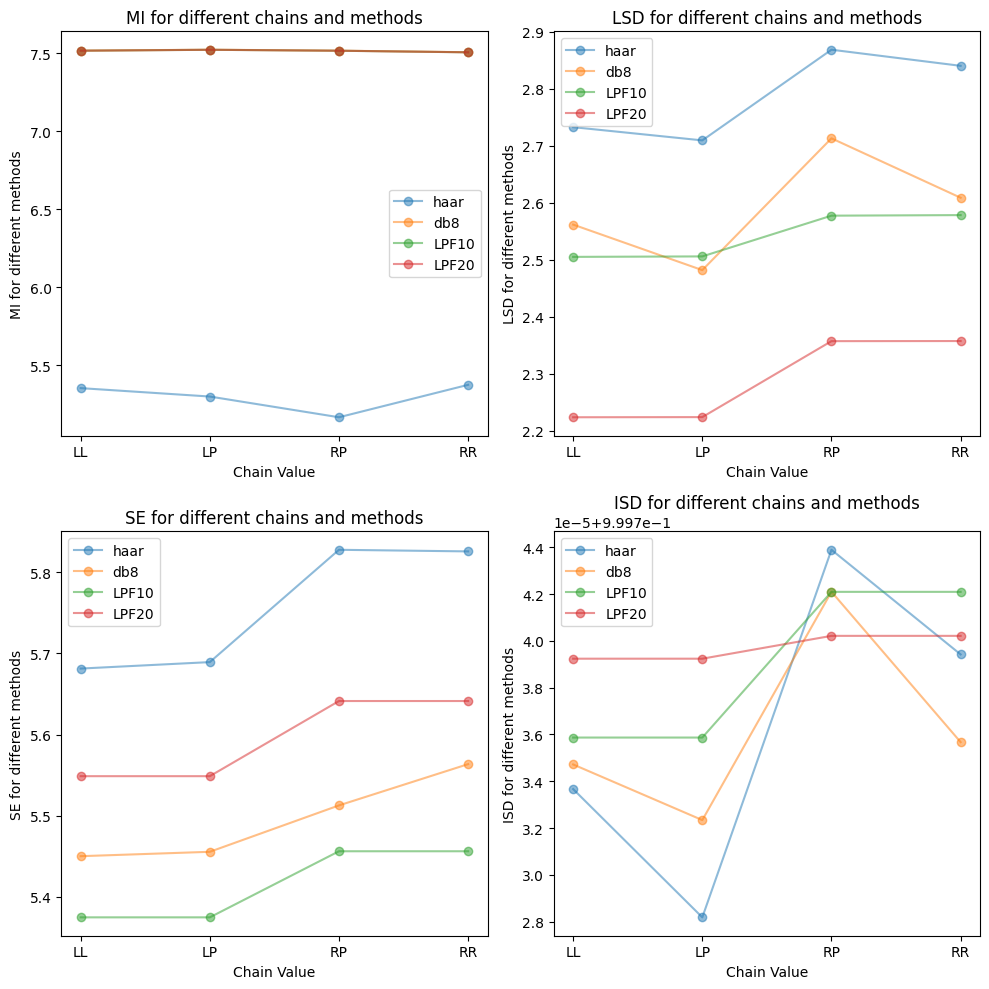

In [54]:
evs =benchmark(eeg_ids)

In [46]:
proc,og = processAndPlot(eeg_id = 1628180742,USE_WAVELET='LPF10',plot=False)
evals = evaluate(proc,og)

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


In [47]:
evals

array({'MI': [7.53176908404604, 7.53176908404604, 7.510553753185993, 7.509860952405823], 'LSD': [1.901370724206433, 1.9013707242888733, 2.2007305292307335, 2.2007305281384597], 'SE': [6.540712771501185, 6.540712772285059, 7.6470094299177465, 7.647009430534], 'ISD': [0.9997631193406459, 0.9997631194498434, 0.9997655512380729, 0.9997655512405915]},
      dtype=object)

## Exporting the processed Spectrograms

In [48]:
%%time
PATH = 'dataset/train_eegs/'
DISPLAY = 4
EEG_IDS = train.eeg_id.unique()[:10]
all_eegs = {}

for eeg_id in tqdm(EEG_IDS):
        # if (i%100==0)&(i!=0): print(i,', ',end='')
        spectrogram_from_eeg(eeg_id)

  0%|          | 0/10 [00:00<?, ?it/s]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)


 10%|█         | 1/10 [00:01<00:12,  1.40s/it]

Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)


 20%|██        | 2/10 [00:01<00:06,  1.31it/s]

Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
I

 30%|███       | 3/10 [00:03<00:08,  1.20s/it]

Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)


 40%|████      | 4/10 [00:04<00:06,  1.06s/it]

Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)


 50%|█████     | 5/10 [00:04<00:03,  1.27it/s]

Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)


 60%|██████    | 6/10 [00:04<00:02,  1.57it/s]

Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)


 80%|████████  | 8/10 [00:05<00:00,  2.22it/s]

Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)


 90%|█████████ | 9/10 [00:05<00:00,  2.36it/s]

Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)


100%|██████████| 10/10 [00:06<00:00,  1.56it/s]

Image shape is: (256, 128)
Image shape is: (384, 128)
Image shape is: (512, 128)
Image shape is: (640, 128)
CPU times: user 30.1 s, sys: 7.09 s, total: 37.1 s
Wall time: 6.4 s
